<a href="https://colab.research.google.com/github/luizleroy/treinamentos/blob/develop/clustering/hierarchicalCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900], [53,950],[55,2000],[47,2100],[52,3000],[32,5900], [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

# base = np.array([[20,1000],[21,2900],[27,1200]
#                 ,[32,5900],[37,1850],[39,4100],[39,7000]
#                 ,[41,5100],[46,900],[47,2100],[48,5000],[48,6500]
#                 ,[52,3000],[53,950],[55,2000]
#                  ])

# base = np.array([[20,1000],[21,2900],[27,2200]
#                 ,[32,5900],[37,11050],[39,4100],[39,7000]
#                 ,[41,5100],[46,9000],[48,16500]
#                 ,[52,15000],[53,1950],[55,20000]
#                 ,[71,100000], [73, 40000], [79,15000]
#                  ])

In [3]:
from google.colab import files
import pandas as pd
import subprocess

In [4]:
file = 'base.csv'
proc=subprocess.Popen('ls ' + file, shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]
if not output:
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

df = pd.read_csv(file, encoding='latin-1', sep=',',header=None)
df
df.describe()

,0,1
count,16.000000,16.000000
mean,45.812500,16043.750000
std,17.653021,24428.950551
min,20.000000,1000.000000
25%,35.750000,3800.000000
50%,43.500000,8000.000000
75%,53.500000,15375.000000
max,79.000000,100000.000000


In [5]:
print('\tidade','$')
base = df.values
base

	idade $


array([[    20,   1000],
       [    21,   2900],
       [    27,   2200],
       [    32,   5900],
       [    37,  11050],
       [    39,   4100],
       [    39,   7000],
       [    41,   5100],
       [    46,   9000],
       [    48,  16500],
       [    52,  15000],
       [    53,   1950],
       [    55,  20000],
       [    71, 100000],
       [    73,  40000],
       [    79,  15000]])

Base para realizar uma análise de espalhamento simples:

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

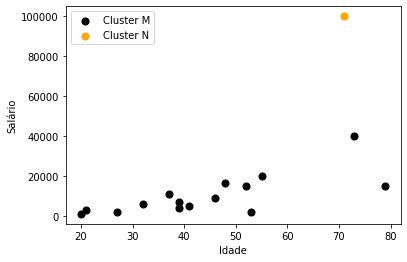

In [7]:
hc = AgglomerativeClustering(linkage = 'ward')
previsoes = hc.fit_predict(base)
previsoes

plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'black', label = 'Cluster M')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'orange', label = 'Cluster N')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()


In [8]:
from sklearn.preprocessing import StandardScaler

## Transformação do tipo *StandardScaler*

In [9]:
scaler = StandardScaler()
transform = scaler.fit_transform(base)
print('Transformando estatisticamente os dados...')
transform

Transformando estatisticamente os dados...


array([[-1.51016841, -0.63601251],
       [-1.4516631 , -0.55568521],
       [-1.10063121, -0.58527948],
       [-0.80810465, -0.42885264],
       [-0.51557808, -0.21112339],
       [-0.39856745, -0.50495218],
       [-0.39856745, -0.38234736],
       [-0.28155682, -0.46267466],
       [ 0.01096975, -0.29779231],
       [ 0.12798037,  0.01928912],
       [ 0.36200163, -0.04412717],
       [ 0.42050694, -0.59584886],
       [ 0.53751757,  0.16726046],
       [ 1.47360259,  3.54946243],
       [ 1.59061322,  1.01281095],
       [ 1.9416451 , -0.04412717]])

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
link = linkage(transform, method = 'ward')
link

array([[ 0.        ,  1.        ,  0.09937478,  2.        ],
       [ 5.        ,  6.        ,  0.12260482,  2.        ],
       [ 7.        , 17.        ,  0.13688649,  3.        ],
       [ 9.        , 10.        ,  0.24246149,  2.        ],
       [ 2.        ,  3.        ,  0.33172451,  2.        ],
       [ 4.        , 18.        ,  0.34942456,  4.        ],
       [12.        , 19.        ,  0.39641142,  3.        ],
       [ 8.        , 11.        ,  0.50651596,  2.        ],
       [16.        , 20.        ,  0.75516223,  4.        ],
       [22.        , 23.        ,  0.79053768,  5.        ],
       [14.        , 15.        ,  1.11370623,  2.        ],
       [21.        , 25.        ,  1.5408733 ,  9.        ],
       [24.        , 27.        ,  2.91385761, 13.        ],
       [13.        , 26.        ,  3.55537822,  3.        ],
       [28.        , 29.        ,  6.10823999, 16.        ]])

Text(0, 0.5, 'Distância Euclidiana Transformada')

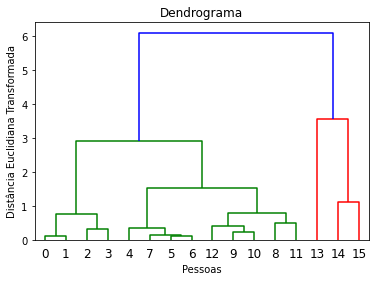

In [12]:
dendrograma = dendrogram(link)
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana ''Transformada''')



---



In [13]:
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
# hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
previsoes = hc.fit_predict(transform)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1])

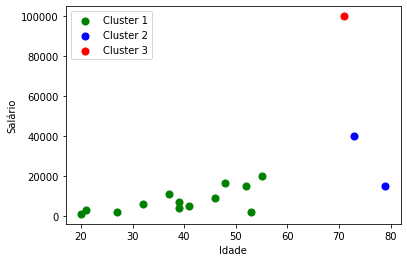

In [14]:
plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
# plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
# plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()  